In [1]:
import geopandas as gpd
import requests
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

# Wczytaj granice świata z pliku zip
world = gpd.read_file("../ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

poland = world[world['NAME'] == 'Poland'] # możemy wybrać kraj, dla jakiego robimy analizę
poland_merc = poland.to_crs(epsg=3857)
xmin, ymin, xmax, ymax = poland_merc.total_bounds
print(f"{xmin=}, {ymin=}, {xmax=}, {ymax=}")


xmin=np.float64(1566768.5233157862), ymin=np.float64(6279511.087609827), xmax=np.float64(2675005.7822184064), ymax=np.float64(7333105.420408971)


In [3]:
# lub możemy określić własny bounding box
xmin = 2322169
ymin = 6744338
xmax = 2407567
ymax = 6844578
area_name = "poludnie_warszawy"
bbox = f"{xmin},{ymin},{xmax},{ymax}"

width_meters = xmax - xmin
height_meters = ymax - ymin
aspect_ratio = width_meters / height_meters

# Ustalmy bazową szerokość - jeśli bounding box nie jest kwadratem, to trzeba dopasować odpowiednio rozdzielczość
base_width = 2048
base_height = int(base_width / aspect_ratio) 
                  
params = {
    "bbox": bbox,
    "bboxSR": "102100",     # EPSG:3857 (Web Mercator)
    "imageSR": "102100",
    "size": f"{base_width},{base_height}",    # rozdzielczość
    "format": "png",        # 'jpg', 'tiff'
    "f": "image"
}

base_url = "https://image.discomap.eea.europa.eu/arcgis/rest/services/Corine/CLC{}_WM/MapServer/export"
years = [1990,2000,2006,2012,2018]
image_names = []

# ściągamy plik dla każdego dostępnego roku
for year in years:
    print(base_url.format(year))
    response = requests.get(base_url.format(year), params=params)

    file_name = f"clc_{area_name}_{year}.png"
    with open(file_name, "wb") as f:
        f.write(response.content)
    image_names.append(file_name)
    print(f"Obraz zapisany jako {file_name}")


https://image.discomap.eea.europa.eu/arcgis/rest/services/Corine/CLC1990_WM/MapServer/export
Obraz zapisany jako clc_poludnie_warszawy_1990.png
https://image.discomap.eea.europa.eu/arcgis/rest/services/Corine/CLC2000_WM/MapServer/export
Obraz zapisany jako clc_poludnie_warszawy_2000.png
https://image.discomap.eea.europa.eu/arcgis/rest/services/Corine/CLC2006_WM/MapServer/export
Obraz zapisany jako clc_poludnie_warszawy_2006.png
https://image.discomap.eea.europa.eu/arcgis/rest/services/Corine/CLC2012_WM/MapServer/export
Obraz zapisany jako clc_poludnie_warszawy_2012.png
https://image.discomap.eea.europa.eu/arcgis/rest/services/Corine/CLC2018_WM/MapServer/export
Obraz zapisany jako clc_poludnie_warszawy_2018.png


In [4]:
level_3_legend = {
    (230, 0, 77): "111 - Zwarta zabudowa miejska",
    (255, 0, 0): "112 - Rozproszona zabudowa miejska",
    (204, 77, 242): "121 - Obszary przemysłowe i handlowe",
    (204, 0, 0): "122 - Sieci drogowe i kolejowe oraz powiązane tereny",
    (230, 204, 204): "123 - Obszary portowe",
    (230, 204, 230): "124 - Lotniska",
    (166, 0, 204): "131 - Tereny wydobycia surowców",
    (166, 77, 0): "132 - Wysypiska",
    (255, 77, 255): "133 - Place budowy",
    (255, 166, 255): "141 - Zielone obszary miejskie",
    (255, 230, 255): "142 - Obiekty sportowe i rekreacyjne",
    (255, 255, 168): "211 - Grunty orne nieirygowane",
    (255, 255, 0): "212 - Grunty orne nawadniane",
    (230, 230, 0): "213 - Pola ryżowe",
    (230, 128, 0): "221 - Winnice",
    (242, 166, 77): "222 - Sady i plantacje owoców jagodowych",
    (230, 166, 0): "223 - Gaje oliwne",
    (230, 230, 77): "231 - Pastwiska",
    (255, 230, 166): "241 - Uprawy jednoroczne powiązane z uprawami trwałymi",
    (255, 230, 77): "242 - Złożone wzorce upraw",
    (230, 204, 77): "243 - Obszary rolnicze z naturalną roślinnością",
    (242, 204, 166): "244 - Obszary agro-leśne",
    (128, 255, 0): "311 - Lasy liściaste",
    (0, 166, 0): "312 - Lasy iglaste",
    (77, 255, 0): "313 - Lasy mieszane",
    (204, 242, 77): "321 - Naturalne trawiaste obszary",
    (166, 255, 128): "322 - Wrzośce i wrzosowiska",
    (166, 230, 77): "323 - Roślinność twardolistna",
    (166, 242, 0): "324 - Przejściowe formy lasu i zarośli",
    (230, 230, 230): "331 - Plaże, wydmy, piaski",
    (204, 204, 204): "332 - Skały lite",
    (204, 255, 204): "333 - Obszary słabo roślinne",
    (0, 0, 0): "334 - Obszary spalone",
    (166, 230, 204): "335 - Lodowce i wieczne śniegi",
    (166, 166, 255): "411 - Bagna śródlądowe",
    (77, 77, 255): "412 - Torfowiska",
    (204, 204, 255): "421 - Słone bagna",
    (230, 230, 255): "422 - Saliny",
    (166, 166, 230): "423 - Płaskie wybrzeża zalewowe",
    (0, 204, 242): "511 - Rzeki",
    (128, 242, 230): "512 - Zbiorniki wodne",
    (0, 255, 166): "521 - Laguny przybrzeżne",
    (166, 255, 230): "522 - Estuaria",
    (230, 242, 255): "523 - Morza i oceany",
    (230, 242, 255): "No Data - Brak danych"
}

## Zdjęcie dla 1990

In [5]:

img = Image.open("clc_poludnie_warszawy_1990.png").convert("RGB")
img_array = np.array(img)

height, width, _ = img_array.shape

pixels = img_array.reshape(-1, 3)
rows = np.repeat(np.arange(height), width)
cols = np.tile(np.arange(width), height)

df = pd.DataFrame({
    'x': cols,
    'y': rows,
    'R': pixels[:, 0],
    'G': pixels[:, 1],
    'B': pixels[:, 2]
})

print(df)


            x     y    R    G    B
0           0     0  255  255  168
1           1     0  255  255  168
2           2     0  255  255  168
3           3     0  255  255  168
4           4     0  255  255  168
...       ...   ...  ...  ...  ...
4921339  2043  2402  255  255  168
4921340  2044  2402  255  255  168
4921341  2045  2402  255  255  168
4921342  2046  2402  255  255  168
4921343  2047  2402  255  255  168

[4921344 rows x 5 columns]


In [6]:
# Zliczenia poszczególnych klas
df["rgb"] = list(zip(df["R"], df["G"], df["B"]))
df['class'] = df['rgb'].map(level_3_legend).fillna('Nieznana')
print(df["class"].value_counts())


class
211 - Grunty orne nieirygowane                          1603625
312 - Lasy iglaste                                       725057
242 - Złożone wzorce upraw                               476972
112 - Rozproszona zabudowa miejska                       444262
231 - Pastwiska                                          398216
222 - Sady i plantacje owoców jagodowych                 350430
313 - Lasy mieszane                                      284974
243 - Obszary rolnicze z naturalną roślinnością          210017
311 - Lasy liściaste                                     186352
511 - Rzeki                                               59785
142 - Obiekty sportowe i rekreacyjne                      48074
121 - Obszary przemysłowe i handlowe                      39003
141 - Zielone obszary miejskie                            20211
512 - Zbiorniki wodne                                     14341
324 - Przejściowe formy lasu i zarośli                    13987
111 - Zwarta zabudowa miejska     

In [7]:
# procentowy udział
class_counts = df["class"].value_counts(normalize=True) * 100
print(class_counts)

class
211 - Grunty orne nieirygowane                          32.585103
312 - Lasy iglaste                                      14.732906
242 - Złożone wzorce upraw                               9.691905
112 - Rozproszona zabudowa miejska                       9.027249
231 - Pastwiska                                          8.091611
222 - Sady i plantacje owoców jagodowych                 7.120616
313 - Lasy mieszane                                      5.790573
243 - Obszary rolnicze z naturalną roślinnością          4.267472
311 - Lasy liściaste                                     3.786608
511 - Rzeki                                              1.214810
142 - Obiekty sportowe i rekreacyjne                     0.976847
121 - Obszary przemysłowe i handlowe                     0.792527
141 - Zielone obszary miejskie                           0.410680
512 - Zbiorniki wodne                                    0.291404
324 - Przejściowe formy lasu i zarośli                   0.284211
111 

In [8]:
unique_values_on_image = np.unique(pixels, axis=0)
unique_values_on_image_tuple = {tuple(color) for color in unique_values_on_image}
legend_only_present_categories = {key : value for key, value in level_3_legend.items() if key in unique_values_on_image_tuple}
print(len(legend_only_present_categories))

25


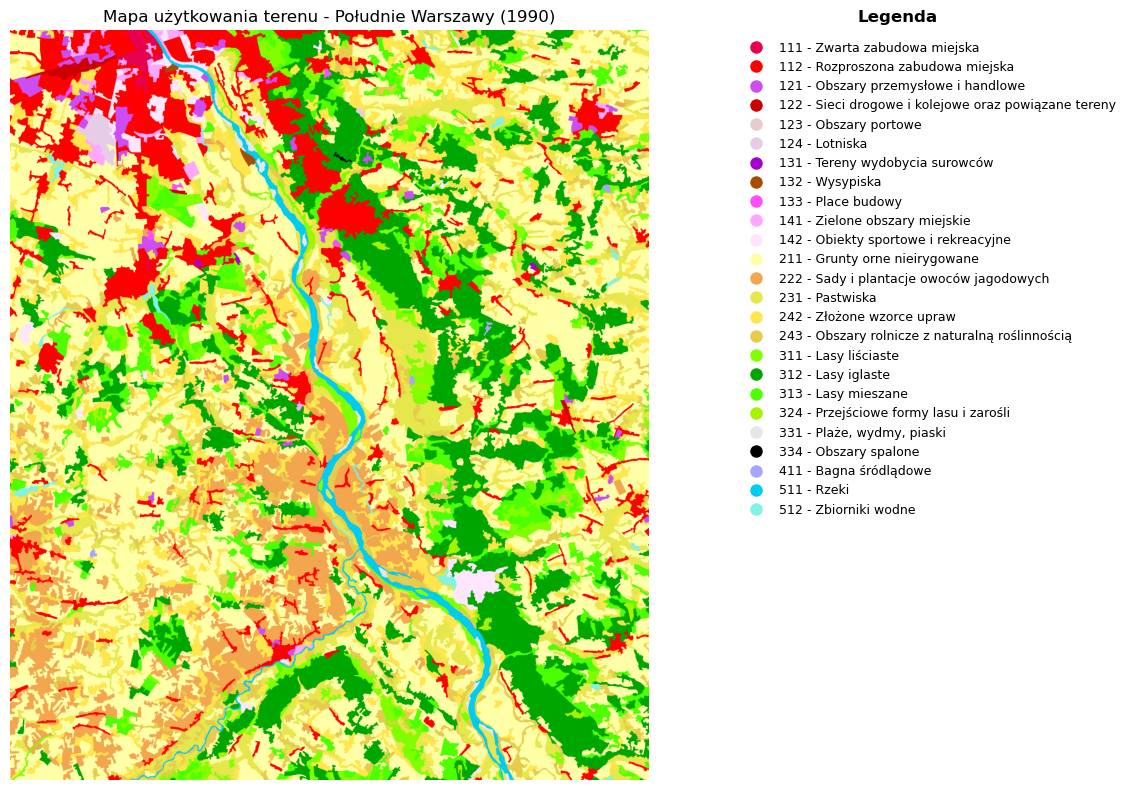

In [9]:
fig, (ax_map, ax_legend) = plt.subplots(ncols=2, figsize=(14, 8), gridspec_kw={'width_ratios': [3, 1]})

# Wyświetlenie mapy na pierwszej osi
ax_map.imshow(img)
ax_map.axis("off")
ax_map.set_title("Mapa użytkowania terenu - Południe Warszawy (1990)")

# Przygotowanie legendy
ax_legend.axis("off")
ax_legend.set_title("Legenda", fontsize=12, fontweight='bold')

# Tworzenie legendy jako tabeli kolorów i opisów
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=np.array(k) / 255.0, label=v)
                  for k, v in legend_only_present_categories.items()]

# Dodanie legendy obok mapy
ax_legend.legend(handles=legend_patches, loc="upper left", fontsize=9, frameon=False)

plt.tight_layout()
plt.show()